Студент: Алексей Ярошенко

# 1. Эссе

## Вольные размышления о применении суперкомпьютеров

Раз тема открытая, то я решил не пытаться найти суперуникальное применение суперкомпьютера в теме, в которой я совершенно не разбираюсь. И вместо этого описать то, о чем я слышал и что считаю действительно важным.

Первый раз я задумался о том, а как же они это считают, когда слушал подкаст о биоинформатике. Там рассказывали про статистическую интерпретацию, я могу ошибаться, но вроде, последовательностей ДНК и воздействия на различные ДНК разными аминокислотами. Последовательностей ДНК явно намного больше, чем людей на нашей планете. В сочетании с различными аминокислоами это - какой-то невероятный объем информации, который на обычном компьютере невозможно обработать. 

Люди, которые заработали денег столько, что за жизнь не потратить, могут опасаться только одного: закончить эту жизнь раньше времени. И если есть возможность исследовать человеческий геном, изобретать новые способы, чтобы быть здоровым и продлить себе жизнь, то эта область будет развиваится. Т.е. если потенциальное здоровье и вероятность умереть позже можно купить, то покупать будут. А значит и вкладываться в вычислительные мощности и суперкомпьютеры, если они понадобятся.

Второй раз, когда я задумался о суперкомпьютерах - это была лекция Сергея Николенко, где мы разбирали сильно упрощенную SIR модель, которую используют в моделировании распространения вируса. Модель работает с графом, у которого есть ребра, которые обозначают контакты. И если у нас в популяции 100 человек, то все хорошо. Но если у нас за популяцию считается целая страна, то социальный граф взаимодействий вырастает до каких-то нереальных размеров, и моделировать на обычном рабочем компьютере это становится просто невозможно. Если мы не моделируем распространение инфекции в Лихтенштейне, конечно :) 

Третий раз, когда я подумал, что здесь без суперкомпьютера не обойтись, был, когда в новостях писали про какие-то смоделированные военные действия, где суперкомпьютер запустил модель и получил результат конфликта. Здесь на первый взгляд может показаться, что вот оно зло: суперкомпьютеры используют в военных целях! И да, уверен, что используют. Но если посмотреть на это с другой стороны, то все становится не таким черно-белым. Ведь вониы возникают только в тех случаях, когда обе стороны конфликта верят в свою победу. Если одна сторона знает, что победит, а второая - что проиграет, то в войне нет смысла. Да, могут быть сражения, но не война. И если прежде чем жертвовать жизнями людей, промоделировать сражение независимо обоими сторонами конфликта, то сам по себе предмет конфликта, победа, перестает быть предметом конфликта, ибо обе стороны знают, кто победит. Это, конечно, всего лишь мои мысли и теория, но я подозреваю, эта теория близка к реальности.

Применений суперкомпьютеров действительно много. Уверен, каждый раз читая новое эссе, вам попадается еще какое-то новое применение, и это здорово. А важнейшие применения, по мне, - это те, которые помогут людям жить дольше, лучше и умирать реже. 

## Как применение суперкомпьютеров и параллельных вычислений пригодится мне в карьере?

Применение суперкомпьютеров - скорее всего, никак, ибо это довольно редко встречающаяся в промышленном машинном обучении и разработке история :) А вот параллельные вычисления в карьере специалиста по работе с данными, думаю, мне очень даже пригодятся.

Уже сейчас мне приходится обрабатывать относительно большие объемы данных. Большие они, правда, только относительно имеющихся в наличие у нас серверов. Сотни гигабайт. И если обрабатывать и преобразовывать их последовательно, то эти процессы могут затянуться надолго. Банальное распараллеливание с помощью встроенного в Python модуля multiprocessing дает ускорение вычислений в разы.

Было бы здорово научиться работать с параллельными вычислениями эффективно. Я уверен, что даже из тех серверов на работе можно выжать больше эффективности.

Еще мне стал очень интересен Deep Learning. Практически все вычисления при обучении нейронок удобно делать на видеокарте, но эти процессы спрятаны "под капотом" того же Pytorch. Разобраться, как работать с CUDA на более низких уровнях было бы очень интересно. К тому же, думаю, это поднимет стоимость меня как специалиста на рынке :)

# 2. Предсказание вычислительной мощности суперкомпьютеров

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

Сначала достанем данные, распарсив кусок JS-кода :)

In [62]:
with open('raw_js.txt', 'r') as file:
    raw_js = ''.join(file.readlines())

In [179]:
dates = re.findall('new Date\((.+?)\),\n', raw_js)
dates = [date.replace(', ', '-').replace('-5-1', '-05-01').replace('-10-1', '-10-01') for date in dates]

top1 = re.findall('#1\s=\s(.+?)\",\n', raw_js)
top1 = [float(s.replace(' GFlop/s', 'e9').replace(' TFlop/s', 'e12').replace(' PFlop/s', 'e15')) for s in top1]

top500 = re.findall('#500\s=\s(.+?)\"],', raw_js)
top500 = [float(s.replace(' GFlop/s', 'e9').replace(' TFlop/s', 'e12').replace(' PFlop/s', 'e15')) for s in top500]

df = pd.DataFrame({'date': dates, 'top1': top1, 'top500': top500})
df.tail()

,date,top1,top500
50,2018-05-01,1.223000e+17,7.156000e+14
51,2018-10-01,1.435000e+17,8.748000e+14
52,2019-05-01,1.486000e+17,1.000000e+15
53,2019-10-01,1.486000e+17,1.100000e+15
54,2020-05-01,4.155000e+17,1.200000e+15


Обучим линейную модель предсказывать $log_{10}$ вычислительной мощности. По статистике Top-500 видно, что зависимость может быть не совсем линейная, поэтому будем обучать коэффициенты полинома 2-й степени.

In [180]:
def get_y(x, coefs):
    coefs = coefs[::-1]
    y = []
    for x_i in x:
        y_i = coefs[0]
        for power, coef in enumerate(coefs[1:], start=1):
            y_i += (x_i**power)*coef
        y.append(y_i)
    return np.array(y)

In [213]:
x = np.arange(df['top1'].shape[0])
y_1 = np.log10(df['top1'])
y_500 = np.log10(df['top500'])

coefs_1 = np.polyfit(x, y_1, deg=2)
coefs_500 = np.polyfit(x, y_500, deg=2)

x_test = np.arange(x.shape[0] + 10)
y_test_1 = 10**get_y(x_test, coefs_1)
y_test_500 = 10**get_y(x_test, coefs_500)

In [214]:
future = np.array([
    '2020-10-01', '2021-05-01', 
    '2021-10-01', '2022-05-01', 
    '2022-10-01', '2023-05-01', 
    '2023-10-01', '2024-05-01', 
    '2024-10-01', '2025-05-01', 
], dtype=object)

dates_with_future = pd.to_datetime(np.concatenate([df['date'].values, future]))

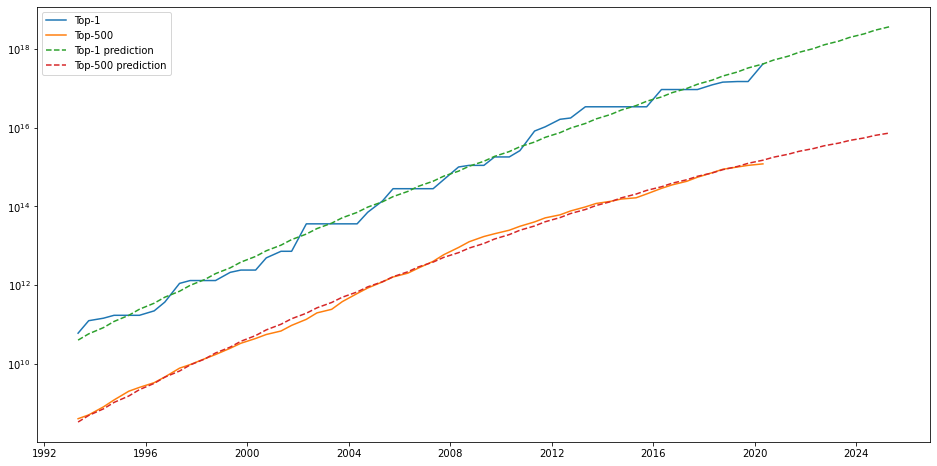

In [220]:
plt.figure(figsize=(16, 8))
plt.yscale("log")

plt.plot(dates_with_future[:-10], df['top1'].values, label='Top-1')
plt.plot(dates_with_future[:-10], df['top500'].values, label='Top-500')
plt.plot(dates_with_future, y_test_1, linestyle='--', label='Top-1 prediction')
plt.plot(dates_with_future, y_test_500, linestyle='--', label='Top-500 prediction')

plt.legend();

In [224]:
y_test_1[-1] / 1e18, y_test_500[-1] / 1e15

(3.680622024420871, 7.319388834679209)

### Прогнозируемая вычислительная мощность суперкомпьютера к 2025-05-01
- Top-1 - 3.68 EFlop/s
- Top-500 - 7.32 PFlop/s